In [1]:
import pandas as pd
import polars as pl
import numpy as np
from plotnine import *
from mizani.formatters import comma_format, custom_format, currency_format, percent_format
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import clear_output, display
import os

pd.set_option('display.max.columns', 500)
theme_set(theme_classic())

%load_ext blackcellmagic
%matplotlib inline

In [7]:
df = (
    pl.read_excel("gemeinden.xlsx", sheet_name="DATA")
)

In [9]:
df.head()

BFS_NR,GEBIET_NAME,THEMA_NAME,SET_NAME,SUBSET_NAME,INDIKATOR_ID,INDIKATOR_NAME,INDIKATOR_JAHR,INDIKATOR_VALUE,EINHEIT_KURZ,EINHEIT_LANG
i64,str,str,str,str,i64,str,i64,f64,str,str
1,"""Aeugst a.A.""","""Bevölkerung un…","""Bevölkerungsbe…","""Bevölkerungsbe…",133,"""Bevölkerung [P…",1962,710.0,"""Pers.""","""Personen"""
1,"""Aeugst a.A.""","""Bevölkerung un…","""Bevölkerungsbe…","""Bevölkerungsbe…",133,"""Bevölkerung [P…",1963,720.0,"""Pers.""","""Personen"""
1,"""Aeugst a.A.""","""Bevölkerung un…","""Bevölkerungsbe…","""Bevölkerungsbe…",133,"""Bevölkerung [P…",1964,705.0,"""Pers.""","""Personen"""
1,"""Aeugst a.A.""","""Bevölkerung un…","""Bevölkerungsbe…","""Bevölkerungsbe…",133,"""Bevölkerung [P…",1965,695.0,"""Pers.""","""Personen"""
1,"""Aeugst a.A.""","""Bevölkerung un…","""Bevölkerungsbe…","""Bevölkerungsbe…",133,"""Bevölkerung [P…",1966,745.0,"""Pers.""","""Personen"""


In [16]:
df["INDIKATOR_NAME"].value_counts().to_pandas()

,INDIKATOR_NAME,counts
0,KRW Wähleranteil SP [%],829
1,Wanderungsbilanz [pro 1000 Einw.],5623
2,Bestand Elektromotor [%],3803
3,Bevölkerungsdichte [Einw./km2],10603
4,Leerwohnungsquote [%],6720
5,Rinderviehbestand [Anz.],3559
6,Bestand Dieselmotor [%],3803
7,NRW Wähleranteil FDP [%],1355
8,Motorräder pro 1000 Einwohner [Anz.],3803
9,Bevölkerungszunahme 5 Jahre [%],10033


### Cross Section of 2022

In [12]:
df["INDIKATOR_JAHR"].describe()

statistic,value
str,f64
"""count""",223346.0
"""null_count""",0.0
"""mean""",2005.770558
"""std""",13.34062
"""min""",23.0
"""25%""",1999.0
"""50%""",2008.0
"""75%""",2015.0
"""max""",2023.0


In [35]:
df.head()

BFS_NR,GEBIET_NAME,THEMA_NAME,SET_NAME,SUBSET_NAME,INDIKATOR_ID,INDIKATOR_NAME,INDIKATOR_JAHR,INDIKATOR_VALUE,EINHEIT_KURZ,EINHEIT_LANG
i64,str,str,str,str,i64,str,i64,f64,str,str
1,"""Aeugst a.A.""","""Bevölkerung un…","""Bevölkerungsbe…","""Bevölkerungsbe…",133,"""Bevölkerung [P…",1962,710.0,"""Pers.""","""Personen"""
1,"""Aeugst a.A.""","""Bevölkerung un…","""Bevölkerungsbe…","""Bevölkerungsbe…",133,"""Bevölkerung [P…",1963,720.0,"""Pers.""","""Personen"""
1,"""Aeugst a.A.""","""Bevölkerung un…","""Bevölkerungsbe…","""Bevölkerungsbe…",133,"""Bevölkerung [P…",1964,705.0,"""Pers.""","""Personen"""
1,"""Aeugst a.A.""","""Bevölkerung un…","""Bevölkerungsbe…","""Bevölkerungsbe…",133,"""Bevölkerung [P…",1965,695.0,"""Pers.""","""Personen"""
1,"""Aeugst a.A.""","""Bevölkerung un…","""Bevölkerungsbe…","""Bevölkerungsbe…",133,"""Bevölkerung [P…",1966,745.0,"""Pers.""","""Personen"""


In [57]:
df.filter(pl.col("INDIKATOR_JAHR") == 2022).select(
    [
        "GEBIET_NAME",
        "INDIKATOR_NAME",
        "INDIKATOR_VALUE",
    ]
).pivot(index="GEBIET_NAME", columns="INDIKATOR_NAME", values="INDIKATOR_VALUE").drop(
    "GEBIET_NAME"
).describe().filter(pl.col("describe").is_in(["mean", "min", "50%", "max"]))

describe,Bevölkerung [Pers.],Ausländeranteil [%],Bevölkerung: Männeranteil [%],Bevölkerungsdichte [Einw./km2],Bevölkerungszunahme 5 Jahre [%],Bevölkerung: Durchschnittsalter [Jahre],Durchschnittliche Haushaltsgrösse [Pers.],Wanderungsbilanz [pro 1000 Einw.],Geburtenrate [pro 1000 Einw.],Sterberate [pro 1000 Einw.],Heiraten [pro 1000 Einw.],Scheidungen [pro 1000 Einw.],Aerzte [pro 1000 Einw.],Arbeitslosenanteil an Bevölkerung 15-64 Jahre [%],Kühe [Anz.],Rinderviehbestand [Anz.],Schweine [Anz.],Schafe [Anz.],Hotelbetten pro 1000 Einwohner [Anz.],Leerwohnungsquote [%],Baulandpreis (gewichteter Median) [Fr./m2],Baulandpreis Modell (Median) [Fr./m2],Personenwagen pro 1000 Einwohner [Anz.],Motorräder pro 1000 Einwohner [Anz.],Motorrad-Neuzulasssungen pro 1000 Einw. [Anz.],Bestand Benzinmotor [%],Bestand Dieselmotor [%],Bestand Hybridantrieb [%],Bestand Elektromotor [%],Neuzulassungen Benzinmotor [%],Neuzulassungen Dieselmotor [%],Neuzulassungen Hybridantrieb [%],Neuzulassungen Elektromotor [%],Ø steuerbares Einkommen natürliche Pers. [Fr.],Ø steuerbares Vermögen natürliche Pers. [1000 Fr.],Steuerfuss (ohne Kirchen) [%],Gesamtsteuerfuss (ohne Kirchen) [%],Steuerfuss juristische Personen [%],Zahnärzte [pro 1000 Einw.]
str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""mean""",9698.748466,20.082209,50.023926,836.925466,5.417178,43.031902,2.305276,5.88589,8.796319,7.393865,4.620245,1.844785,1.111656,1.34058,248.907975,564.018405,210.453988,102.411043,8.925153,0.855706,1680.5625,1175.4375,575.881595,96.077301,5.258282,63.160123,27.31227,6.12638,3.101227,34.234356,10.933129,32.019018,22.680982,71709.521472,555.478528,106.932099,106.920802,118.829877,0.462105
"""min""",381.0,6.9,47.2,69.6,-2.7,38.4,1.98,-35.7,2.8,0.9,0.0,0.0,0.0,0.6,0.0,0.0,0.0,0.0,0.0,0.0,533.0,369.0,319.9,53.5,0.0,53.9,21.2,3.0,1.1,21.4,0.0,5.6,0.0,9634.0,135.0,72.0,72.0,79.56,0.0
"""50%""",4670.0,19.1,50.0,564.7,4.2,43.0,2.31,3.8,8.6,7.4,4.5,1.9,0.9,1.3,154.0,392.0,2.0,30.0,0.0,0.77,1353.0,1134.0,579.3,93.6,4.8,63.2,27.3,6.1,3.0,34.2,10.1,32.7,21.9,67447.0,407.0,110.0,110.0,121.41,0.4
"""max""",426890.0,48.1,52.7,4855.4,23.9,48.0,2.63,84.9,20.4,15.6,8.8,5.3,5.5,2.4,2094.0,3959.0,2680.0,957.0,205.6,3.35,4719.0,3251.0,721.9,162.6,11.7,70.3,34.9,12.1,6.5,55.6,33.3,54.5,50.0,147821.0,4087.0,130.0,130.0,142.8,1.2


### Time Series

How do all of the values move over time?

In [109]:
plot_data = (
    df.filter(
        pl.col("INDIKATOR_NAME").is_in(
            [
                # "NRW Wähleranteil FDP [%]",
                "Neuzulassungen Benzinmotor [%]",
                "Bevölkerungsdichte [Einw./km2]",
                # "NRW Wähleranteil SVP [%]",
                "Steuerb. Einkommen natürl. Pers. Durchschn. [Fr.]",
                "Personenwagen pro 1000 Einwohner [Anz.]",
                "Ausländeranteil [%]",
                "Geburtenrate [pro 1000 Einw.]",
                # "Zahnärzte [pro 1000 Einw.]",
                "Steuerb. Einkommen natürl. Pers. Median [Fr.]",
                "Bestand Dieselmotor [%]",
               #  "Bevölkerung [Pers.]",
               #  "Hotelbetten pro 1000 Einwohner [Anz.]",
                # "Rinderviehbestand [Anz.]",
                "Bevölkerung: Durchschnittsalter [Jahre]",
                "Steuerfuss (ohne Kirchen) [%]",
                # "Bevölkerungszunahme 5 Jahre [%]",
                "Baulandpreis Modell (Median) [Fr./m2]",
                "Bestand Benzinmotor [%]",
                # "Bevölkerung: Männeranteil [%]",
                # "KRW Wähleranteil SVP [%]",
                "Ø steuerbares Vermögen natürliche Pers. [1000 Fr.]",
                "Ø steuerbares Einkommen natürliche Pers. [Fr.]",
                # "Gesamtsteuerfuss (ohne Kirchen) [%]",
                # "Kühe [Anz.]",
                "Steuerb. Vermögen natürl. Pers. Durchschn. [Fr.]",
                # "Wahlbeteiligung Nationalrat [%]",
                "Leerwohnungsquote [%]",
                # "KRW Wähleranteil FDP [%]",
               #  "Motorrad-Neuzulasssungen pro 1000 Einw. [Anz.]",
                "Steuerb. Vermögen natürl. Pers. Median [Fr.]",
               #  "Schweine [Anz.]",
                "Arbeitslosenanteil an Bevölkerung 15-64 Jahre [%]",
                "Scheidungen [pro 1000 Einw.]",
                "Baulandpreis (gewichteter Median) [Fr./m2]",
                "Steuerfuss juristische Personen [%]",
                "Bestand Elektromotor [%]",
                "Wasserverbrauch pro Tag und Kopf [Liter]",
               #  "Wanderungsbilanz [pro 1000 Einw.]",
                "Sozialhilfequote [%]",
                "Durchschnittliche Haushaltsgrösse [Pers.]",
                "Neuzulassungen  Hybridantrieb [%]",
                "Neuzulassungen  Elektromotor [%]",
                "Neuzulassungen  Dieselmotor [%]",
               #  "Schafe [Anz.]",
                "Restaurants pro 1000 Einwohner [Anz.]",
               #  "KRW Wähleranteil SP [%]",
               #  "Sterberate [pro 1000 Einw.]",
                # "Wahlbeteiligung Kantonsrat [%]",
                # "Aerzte [pro 1000 Einw.]",
                # "NRW Wähleranteil SP [%]",
                "Bestand Hybridantrieb [%]",
                "Motorräder pro 1000 Einwohner [Anz.]",
                "Heiraten [pro 1000 Einw.]",
            ]
        )
    )
    .group_by(["INDIKATOR_NAME", "INDIKATOR_JAHR"])
    .agg(
        pl.col("INDIKATOR_VALUE").mean().alias("avg"),
        pl.col("INDIKATOR_VALUE").quantile(0.25).alias("lower"),
        pl.col("INDIKATOR_VALUE").quantile(0.5).alias("med"),
        pl.col("INDIKATOR_VALUE").quantile(0.75).alias("higher"),
    )
)

plot_data.head()

INDIKATOR_NAME,INDIKATOR_JAHR,avg,lower,med,higher
str,i64,f64,f64,f64,f64
"""Ausländerantei…",1980,10.875,4.7,10.6,15.7
"""Ausländerantei…",1993,12.510465,6.8,11.8,17.3
"""Ausländerantei…",2001,13.620339,7.2,12.3,18.6
"""Ausländerantei…",2013,17.441808,10.8,16.1,23.0
"""Ausländerantei…",2018,18.95858,12.0,18.1,24.9


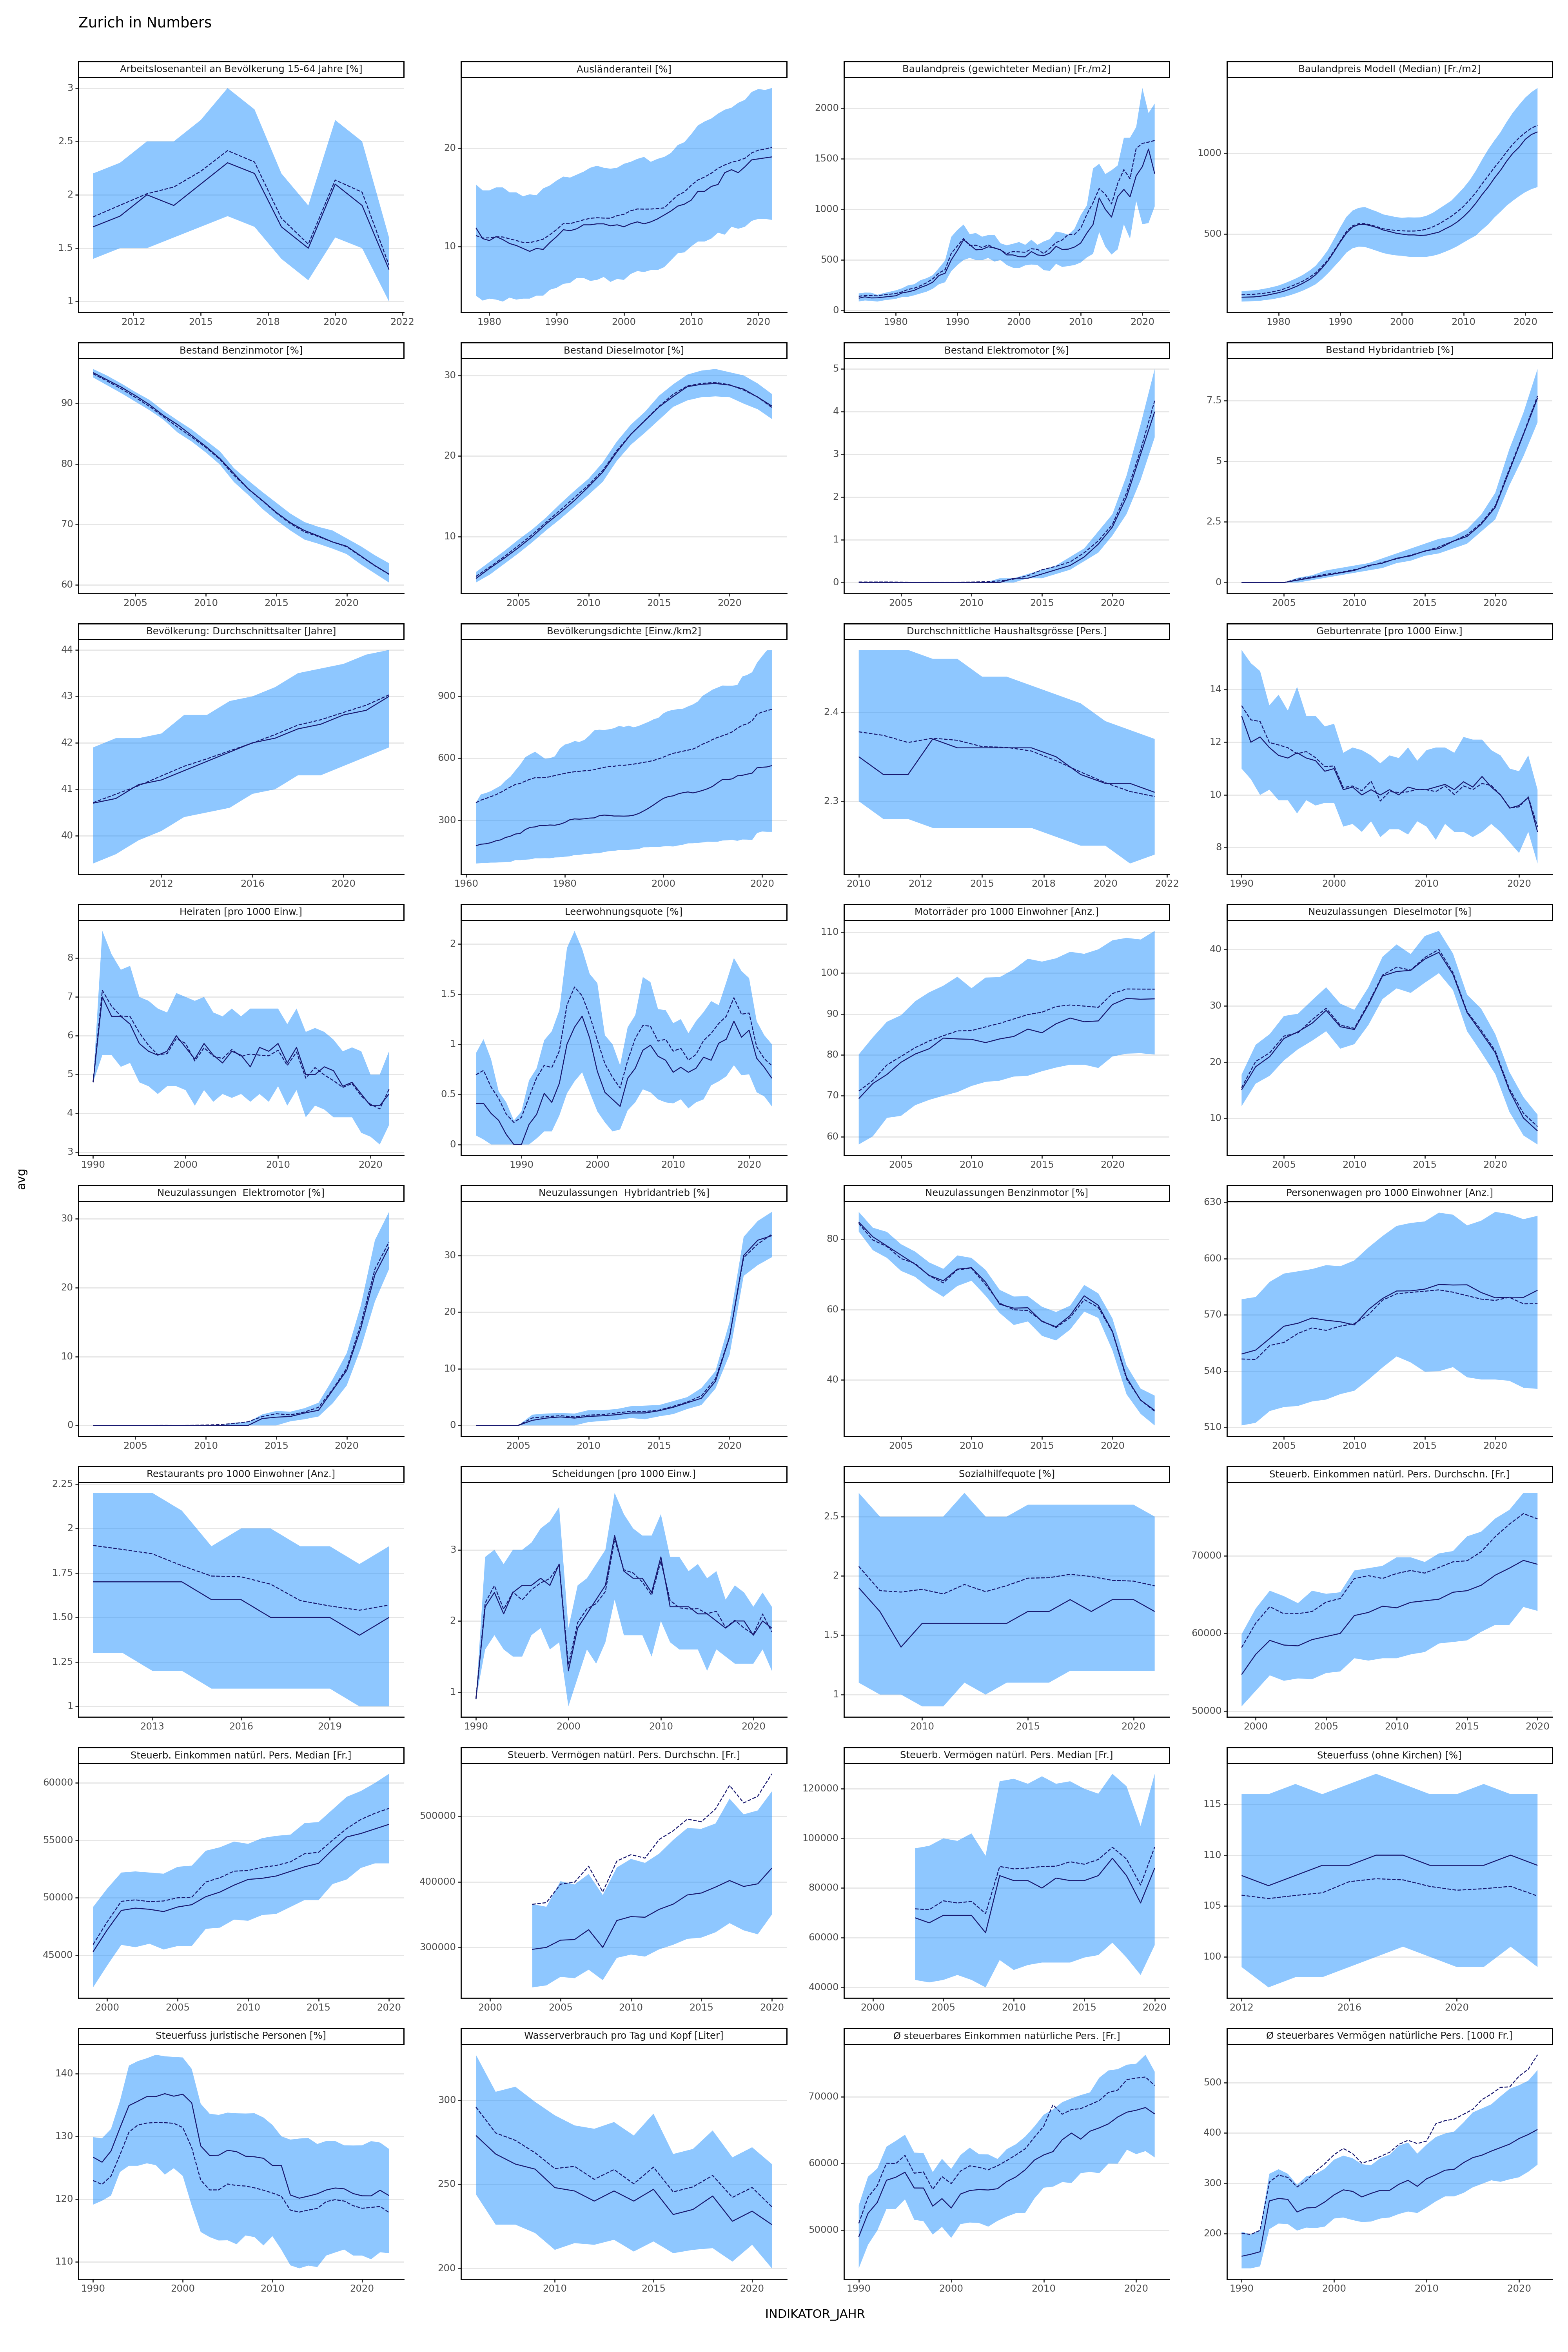

<Figure Size: (2000 x 3000)>

In [112]:
from mizani.formatters import currency_format

p = (
    ggplot(data=plot_data, mapping=aes(x="INDIKATOR_JAHR"))
    + geom_ribbon(
        mapping=aes(ymin="lower", ymax="higher"), fill="dodgerblue", alpha=0.5
    )
    + geom_line(mapping=aes(y="avg"), colour="midnightblue", linetype="dashed")
    + geom_line(mapping=aes(y="med"), colour="midnightblue")
    + labs(title="Zurich in Numbers")
    + facet_wrap("~ INDIKATOR_NAME", ncol=4, scales="free")
    + scale_x_continuous(labels=currency_format(big_mark="", prefix="", suffix="", digits=0))
    + theme(figure_size=[20, 30],
            panel_grid_major_y=element_line(colour="#e5e5e5"))
)

p

In [114]:
p.save("Zurich.pdf", limitsize=False)

c:\Users\mathi\miniconda3\envs\general\Lib\site-packages\plotnine\ggplot.py:587: PlotnineWarning: Saving 20 x 30 in image.
c:\Users\mathi\miniconda3\envs\general\Lib\site-packages\plotnine\ggplot.py:588: PlotnineWarning: Filename: Zurich.pdf


Plot city of Zurich:

In [133]:
plot_data = (
    df.with_columns(
        pl.when(pl.col("GEBIET_NAME") == "Zürich")
        .then(pl.lit("Zürich"))
        .otherwise(pl.lit("Agglomeration"))
        .alias("GEBIET_NAME")
    )
    .filter(
        pl.col("INDIKATOR_NAME").is_in(
            [
                # "NRW Wähleranteil FDP [%]",
                "Neuzulassungen Benzinmotor [%]",
                "Bevölkerungsdichte [Einw./km2]",
                # "NRW Wähleranteil SVP [%]",
                "Steuerb. Einkommen natürl. Pers. Durchschn. [Fr.]",
                "Personenwagen pro 1000 Einwohner [Anz.]",
                "Ausländeranteil [%]",
                "Geburtenrate [pro 1000 Einw.]",
                # "Zahnärzte [pro 1000 Einw.]",
                "Steuerb. Einkommen natürl. Pers. Median [Fr.]",
                "Bestand Dieselmotor [%]",
               #  "Bevölkerung [Pers.]",
               #  "Hotelbetten pro 1000 Einwohner [Anz.]",
                # "Rinderviehbestand [Anz.]",
                "Bevölkerung: Durchschnittsalter [Jahre]",
                "Steuerfuss (ohne Kirchen) [%]",
                # "Bevölkerungszunahme 5 Jahre [%]",
                "Baulandpreis Modell (Median) [Fr./m2]",
                "Bestand Benzinmotor [%]",
                # "Bevölkerung: Männeranteil [%]",
                # "KRW Wähleranteil SVP [%]",
                "Ø steuerbares Vermögen natürliche Pers. [1000 Fr.]",
                "Ø steuerbares Einkommen natürliche Pers. [Fr.]",
                # "Gesamtsteuerfuss (ohne Kirchen) [%]",
                # "Kühe [Anz.]",
                "Steuerb. Vermögen natürl. Pers. Durchschn. [Fr.]",
                # "Wahlbeteiligung Nationalrat [%]",
                "Leerwohnungsquote [%]",
                # "KRW Wähleranteil FDP [%]",
               #  "Motorrad-Neuzulasssungen pro 1000 Einw. [Anz.]",
                "Steuerb. Vermögen natürl. Pers. Median [Fr.]",
               #  "Schweine [Anz.]",
                "Arbeitslosenanteil an Bevölkerung 15-64 Jahre [%]",
                "Scheidungen [pro 1000 Einw.]",
                "Baulandpreis (gewichteter Median) [Fr./m2]",
                "Steuerfuss juristische Personen [%]",
                "Bestand Elektromotor [%]",
                "Wasserverbrauch pro Tag und Kopf [Liter]",
               #  "Wanderungsbilanz [pro 1000 Einw.]",
                "Sozialhilfequote [%]",
                "Durchschnittliche Haushaltsgrösse [Pers.]",
                "Neuzulassungen  Hybridantrieb [%]",
                "Neuzulassungen  Elektromotor [%]",
                "Neuzulassungen  Dieselmotor [%]",
               #  "Schafe [Anz.]",
                "Restaurants pro 1000 Einwohner [Anz.]",
               #  "KRW Wähleranteil SP [%]",
               #  "Sterberate [pro 1000 Einw.]",
                # "Wahlbeteiligung Kantonsrat [%]",
                # "Aerzte [pro 1000 Einw.]",
                # "NRW Wähleranteil SP [%]",
                "Bestand Hybridantrieb [%]",
                "Motorräder pro 1000 Einwohner [Anz.]",
                "Heiraten [pro 1000 Einw.]",
            ]
        )
    )
    .group_by(["GEBIET_NAME", "INDIKATOR_NAME", "INDIKATOR_JAHR"])
    .agg(
        pl.col("INDIKATOR_VALUE").median().alias("med"),
    )
)

plot_data.head()

GEBIET_NAME,INDIKATOR_NAME,INDIKATOR_JAHR,med
str,str,i64,f64
"""Agglomeration""","""Ausländerantei…",1981,10.9
"""Agglomeration""","""Ausländerantei…",1986,9.5
"""Agglomeration""","""Ausländerantei…",1999,11.95
"""Agglomeration""","""Ausländerantei…",2007,13.5
"""Agglomeration""","""Ausländerantei…",2011,15.55


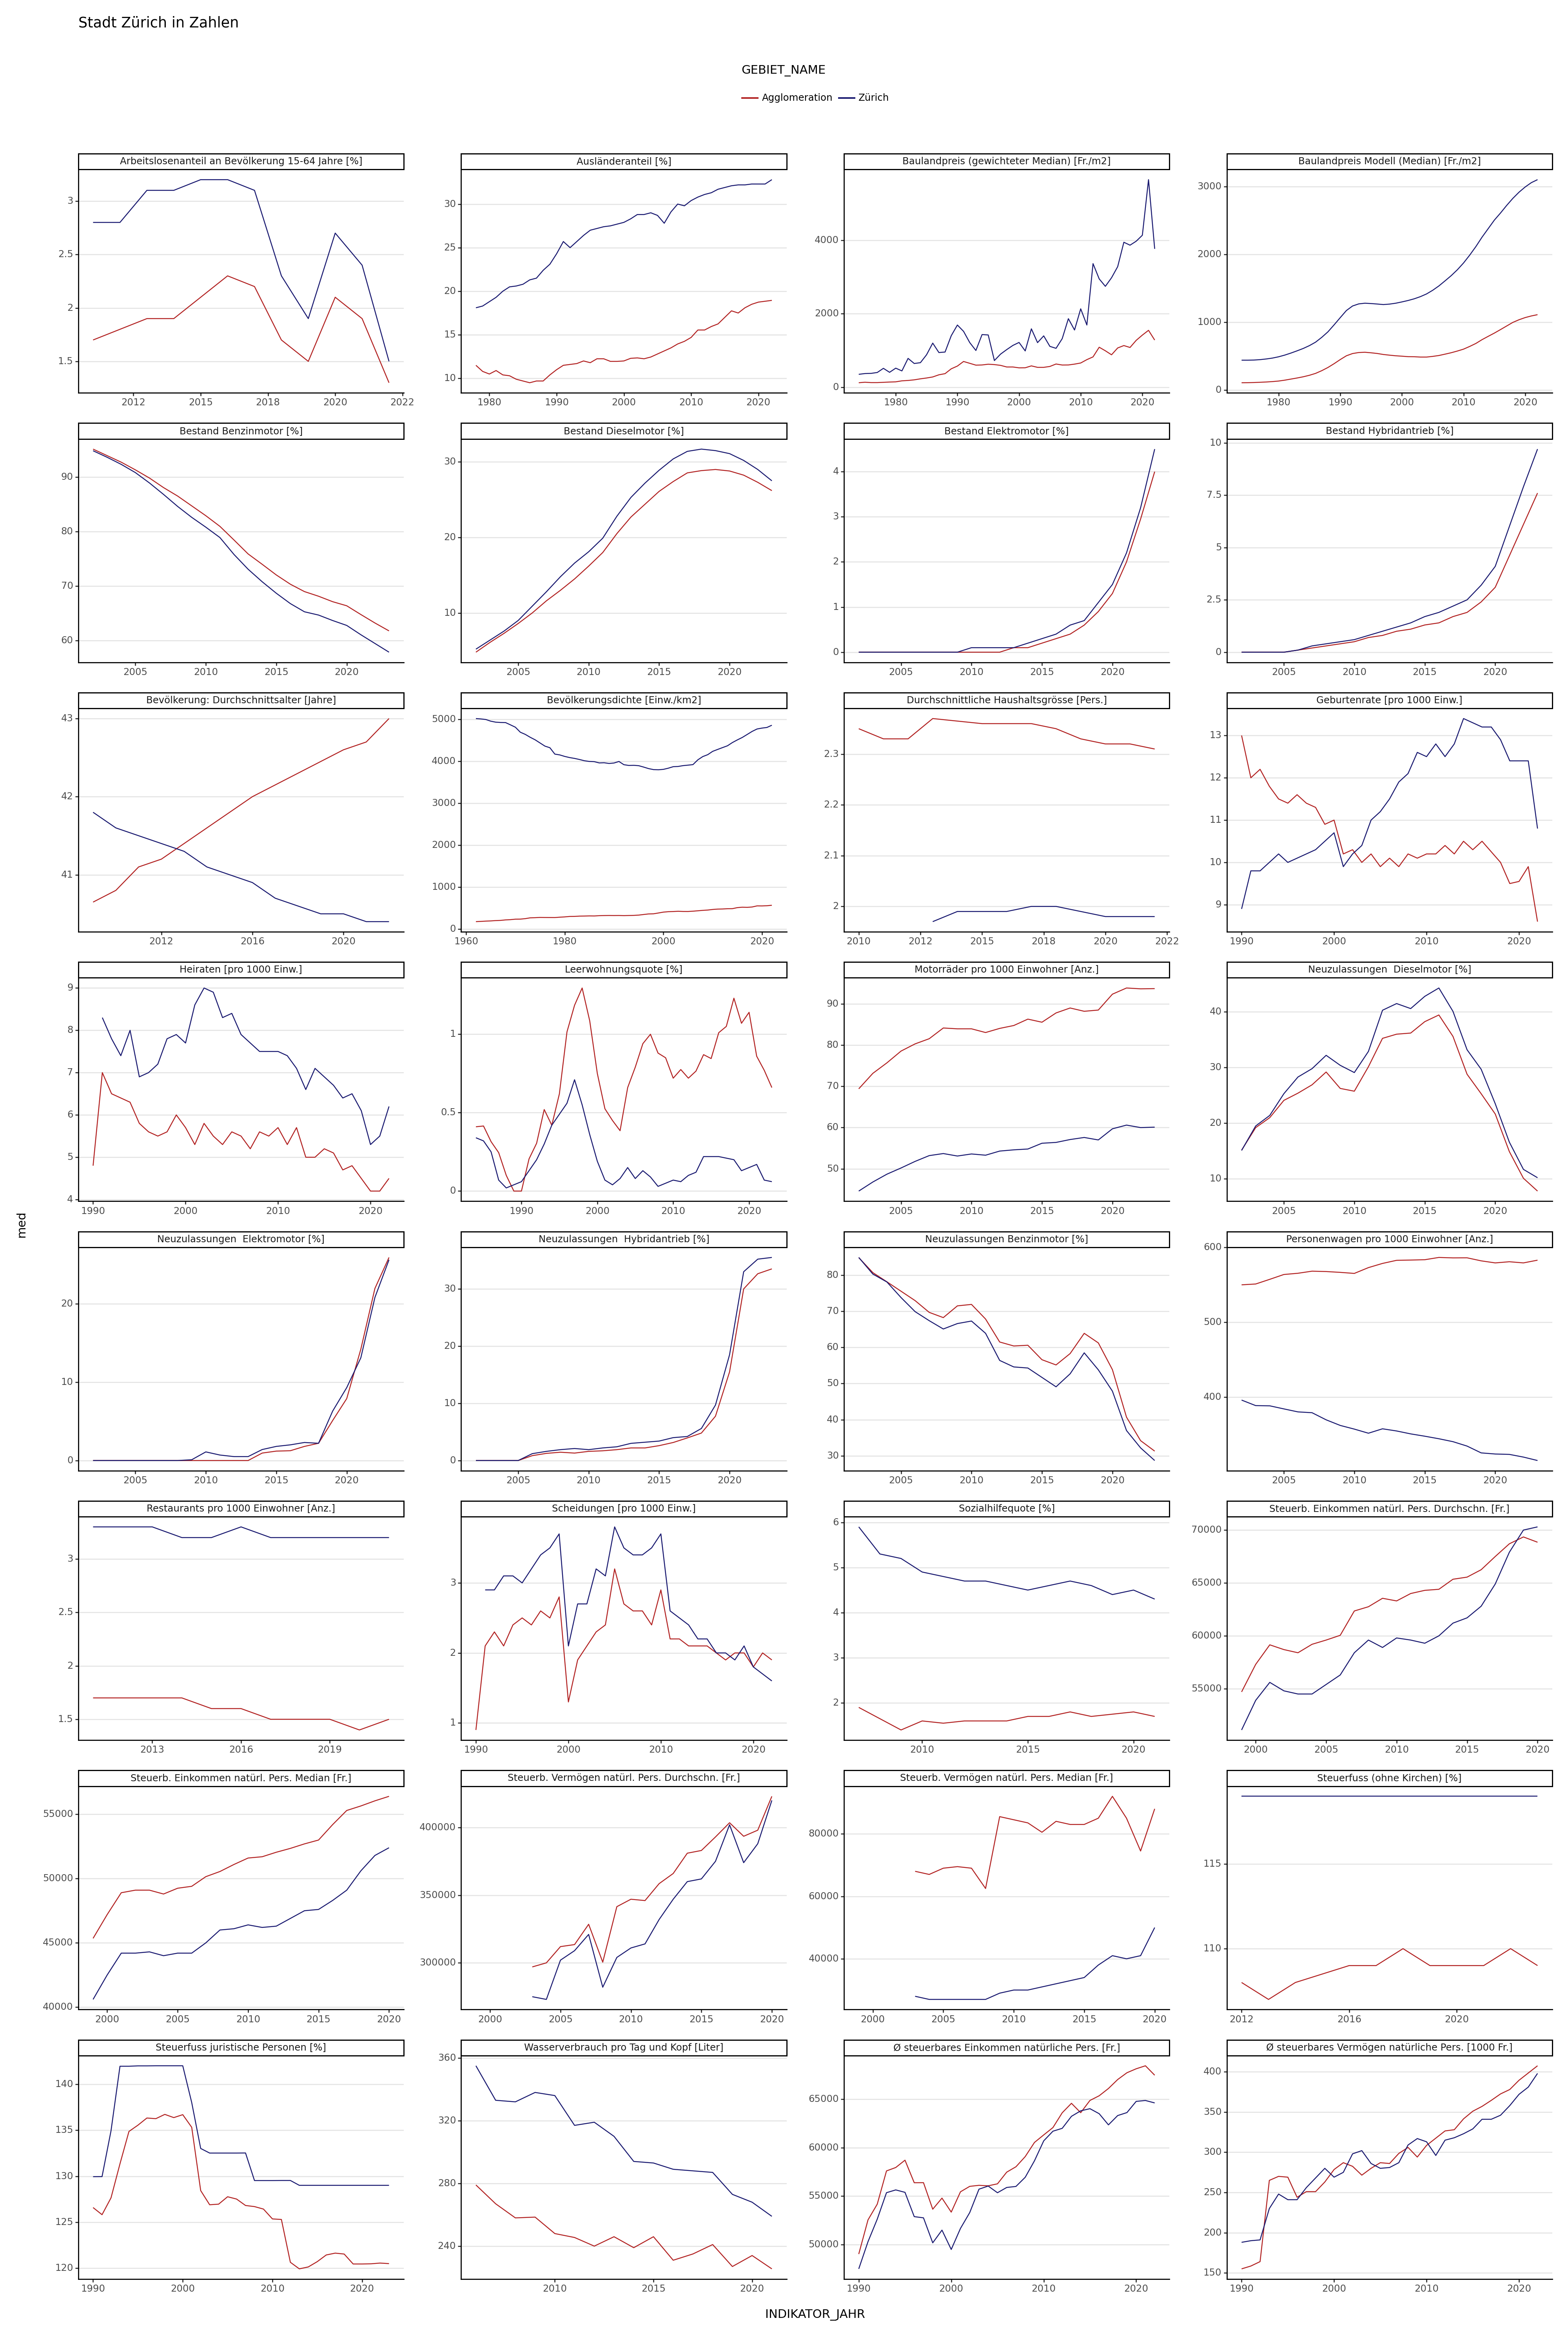

<Figure Size: (2000 x 3000)>

In [135]:
from mizani.formatters import currency_format

p = (
    ggplot(data=plot_data, mapping=aes(x="INDIKATOR_JAHR", colour="GEBIET_NAME"))
    + geom_line(mapping=aes(y="med"))
    + labs(title="Stadt Zürich in Zahlen")
    + facet_wrap("~ INDIKATOR_NAME", ncol=4, scales="free")
    + scale_x_continuous(labels=currency_format(big_mark="", prefix="", suffix="", digits=0))
    + scale_colour_manual(values=["firebrick", "midnightblue"])
    + theme(figure_size=[20, 30],
            panel_grid_major_y=element_line(colour="#e5e5e5"),
            legend_position="top")
)

p

In [136]:
p.save("City-vs-Land.pdf", limitsize=False)

c:\Users\mathi\miniconda3\envs\general\Lib\site-packages\plotnine\ggplot.py:587: PlotnineWarning: Saving 20 x 30 in image.
c:\Users\mathi\miniconda3\envs\general\Lib\site-packages\plotnine\ggplot.py:588: PlotnineWarning: Filename: City-vs-Land.pdf
